#### Data Analysis and Prediction for prospare Bank

In [1]:
# install necessary library
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install scikit-learn
! pip install xgboost


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Fortu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Fortu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Fortu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Fortu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Fortu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Fortu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Open the credit risk data set for data exploration

In [2]:
credit_risk = pd.read_csv('credit_risk_dataset.csv')
print(credit_risk.head(20))
print(credit_risk.tail())

    person_age  person_income person_home_ownership  person_emp_length  \
0           22          59000                  RENT              123.0   
1           21           9600                   OWN                5.0   
2           25           9600              MORTGAGE                1.0   
3           23          65500                  RENT                4.0   
4           24          54400                  RENT                8.0   
5           21           9900                   OWN                2.0   
6           26          77100                  RENT                8.0   
7           24          78956                  RENT                5.0   
8           24          83000                  RENT                8.0   
9           21          10000                   OWN                6.0   
10          22          85000                  RENT                6.0   
11          21          10000                   OWN                2.0   
12          23          95000         

In [3]:
print(credit_risk.dtypes)





person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [4]:
credit_risk.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


the data set contains 32581 data entries entered in 12 columns
and it contains missing values


In [5]:
print(credit_risk.describe())


         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

###### checking for missing values

In [6]:
credit_risk.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

#### visualise data

##### Visualise target variablw


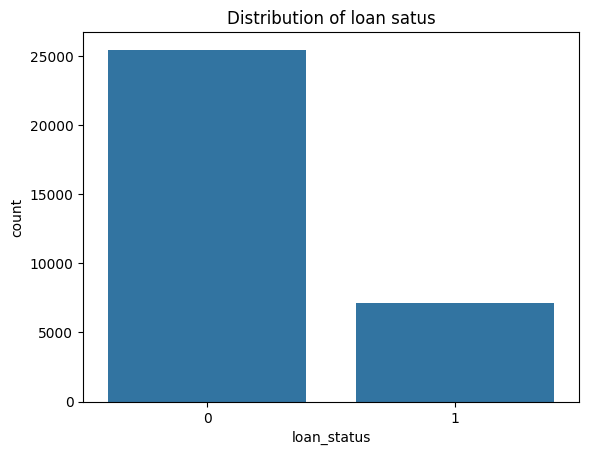

In [7]:
sn.countplot(x='loan_status', data=credit_risk)
plt.title('Distribution of loan satus')
plt.show()

This is a bar chart which shows loan status distribution. 0 indicates repayment and 1 indicates loan default. the chart shows that 25000 loans have been repaid approximately, which means there is a strong repayment of loans. meanwhile around 5000 loans are in default, showing a relatively low rate of loan dafault. This chart highlights the importance of analying repayment pattern as non repayment represent a small but yet very important group for Prospera bank to monitor

##### Pie chart

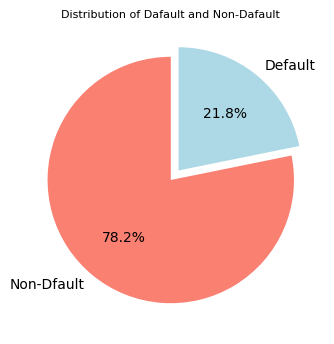

In [8]:
loan_status_counts= credit_risk['loan_status'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(loan_status_counts,
        labels=['Non-Dfault', 'Default'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['salmon', 'lightblue'],
        explode=(0, 0.1))
plt.title('Distribution of Dafault and Non-Dafault', fontsize = 8)
plt.show()

From the pie chart above it could be seen that 78.2% accountes for those that repaid their loans while 21.8% showes that smaller proportion of the borrowers failed in repaying back thier loans. From the chart it can be deduced that there is a favourable repayment pattern comapare to to those of default that is less than a quater. Despite the fact there is a favourable repayment pattern it is still adviseable for prospera bank to monitor the 21.8% of those that failed in repaying their loan as to minimise risk and improve the overall loan performance portfolio.

C:\Users\Fortu\AppData\Local\Temp\ipykernel_9616\4159310047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='person_home_ownership', y='loan_status', data=credit_risk, palette='coolwarm')


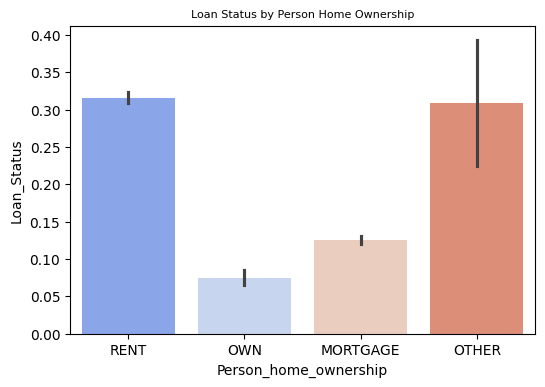

In [9]:
plt.figure(figsize=(6,4))
sn.barplot(x='person_home_ownership', y='loan_status', data=credit_risk, palette='coolwarm')
plt.title('Loan Status by Person Home Ownership', fontsize = 8)
plt.ylabel('Loan_Status')
plt.xlabel('Person_home_ownership')
plt.show()

The bar chat shows the relationship between loan status and home ownership. those that are on rented apartment have the highest proportion of defaults, which fall around 30%, those that own their house show lowest dafault rate which shows 10% of home owneres default in paying of thier loan. those on mortage have a default rate of 15%. The other categories had highest non-repayment rate of 35%. From the chart it can be deduced those that have their own house  are financial more stable in contrast to renting and other categories associated with higher risk.

C:\Users\Fortu\AppData\Local\Temp\ipykernel_9616\11909784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='loan_intent', y='loan_status', data=credit_risk, palette='coolwarm')


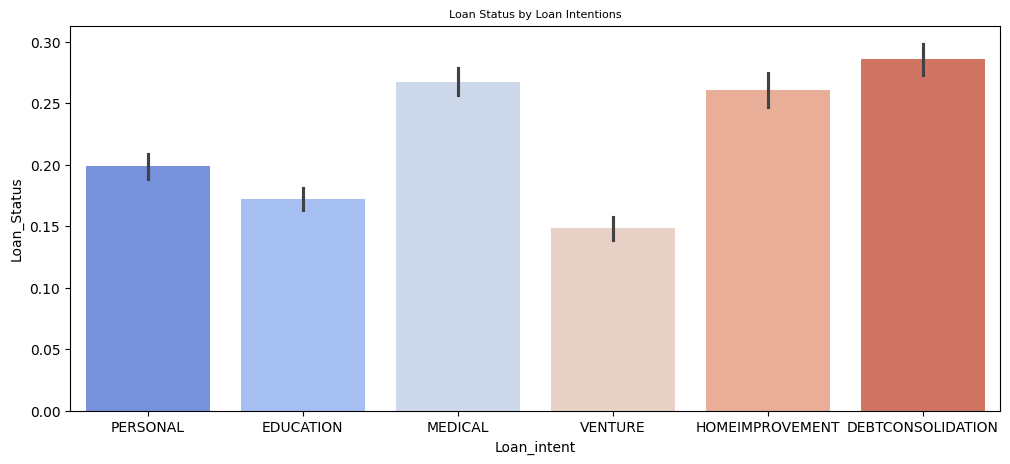

In [10]:
plt.figure(figsize=(12,5))
sn.barplot(x='loan_intent', y='loan_status', data=credit_risk, palette='coolwarm')
plt.title('Loan Status by Loan Intentions', fontsize = 8)
plt.ylabel('Loan_Status')
plt.xlabel('Loan_intent')
plt.show()

The bar chart shows the relationship between loan Status and the purpose for the loan. it could been seen that those that took loan for medical, Homeimprovement and debtconsolidation had the hight percentage of default followed by those that took loan for peerson and education reasons. the least default was those that look loan for Venture purpose.

##### histograms

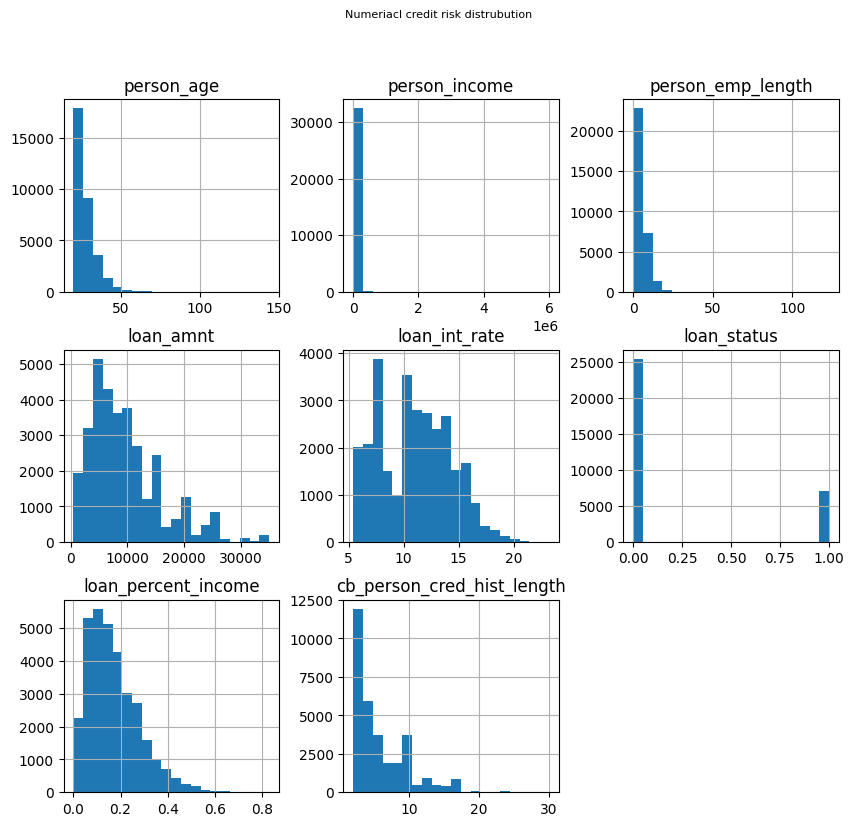

In [11]:
num_credit_risk = credit_risk.select_dtypes(include=['float64', 'int64']).columns
credit_risk[num_credit_risk].hist(figsize=(10,9), bins=(20))
plt.suptitle('Numeriacl credit risk distrubution', fontsize=8)
plt.show()

The histograms shows the distribution of numerical features. it could be seen that most borrowers age are concentrated below 50 whith a small decline beyond 50 , for the icome majority of borrowers earn less than 1 million, for indidvual that are emplyed they have less than 20 years work experience

C:\Users\Fortu\AppData\Local\Temp\ipykernel_9616\4106018419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='cb_person_default_on_file', y='loan_status', data=credit_risk, palette='coolwarm')


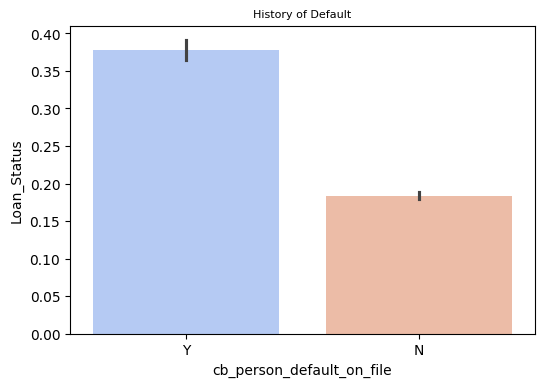

In [12]:
plt.figure(figsize=(6,4))
sn.barplot(x='cb_person_default_on_file', y='loan_status', data=credit_risk, palette='coolwarm')
plt.title('History of Default', fontsize = 8)
plt.ylabel('Loan_Status')
plt.xlabel('cb_person_default_on_file')
plt.show()  

from the bar chat it could be seen that that close to 40% had history of default while around 20% had no history of default. this shows a persons loan default histroty would strongly contribute to the rapyment behaviour of the indvidual.

C:\Users\Fortu\AppData\Local\Temp\ipykernel_9616\2355112248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='loan_int_rate', y='loan_status', data=credit_risk, palette='coolwarm')


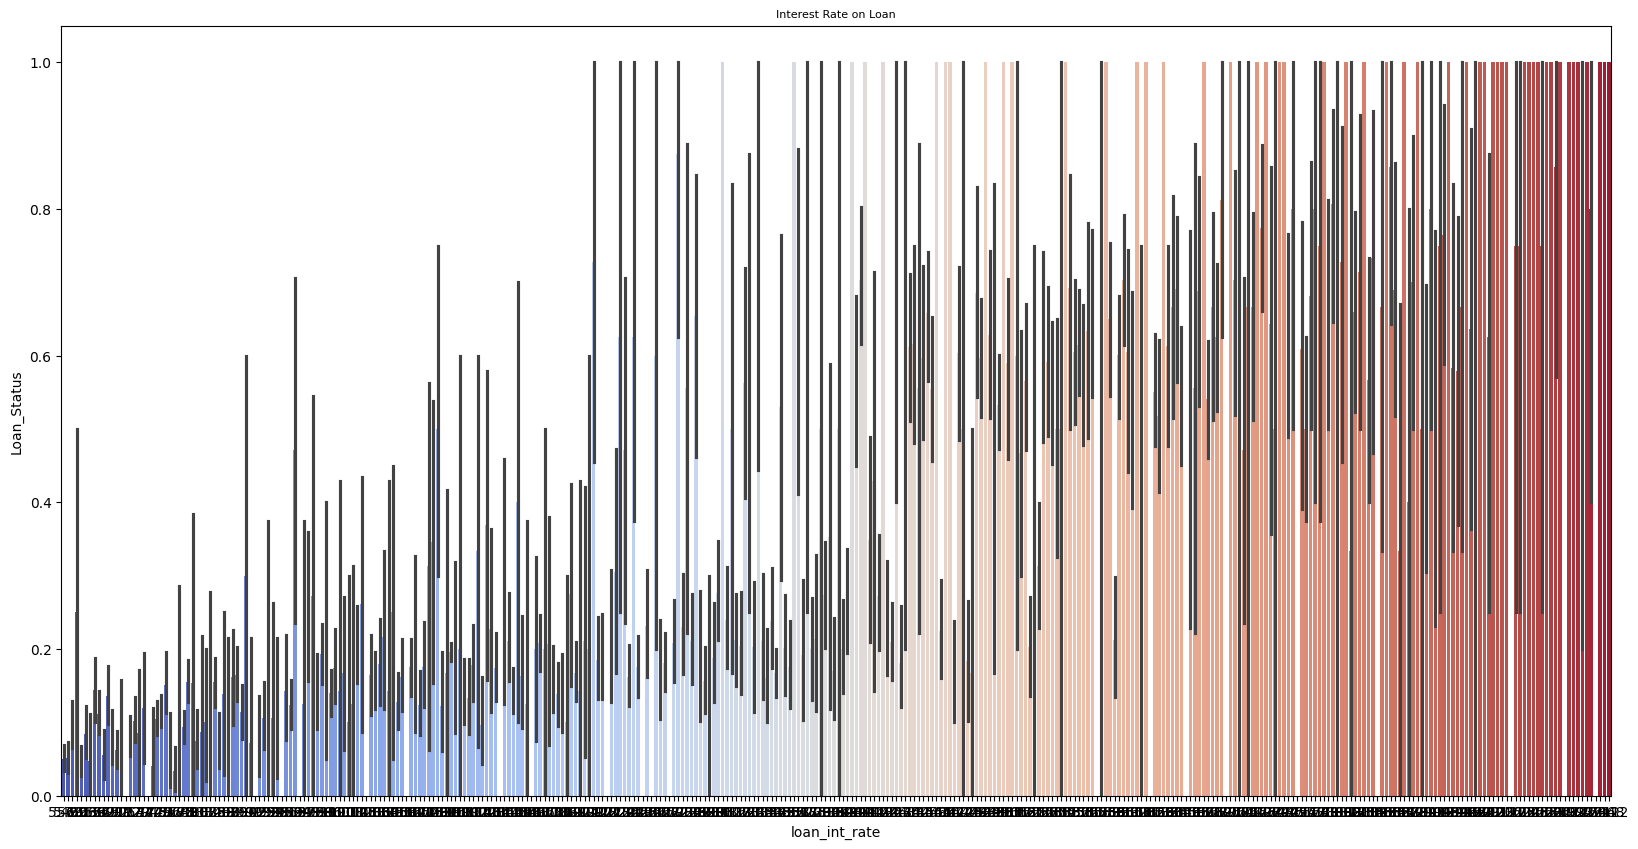

In [29]:
plt.figure(figsize=(20,10))
sn.barplot(x='loan_int_rate', y='loan_status', data=credit_risk, palette='coolwarm')
plt.title('Interest Rate on Loan', fontsize = 8)
plt.ylabel('Loan_Status')
plt.xlabel('loan_int_rate')
plt.show()

# correct when back from work

This chart shows that increased interest rate  leades to increase in defaulters

#### Outliers

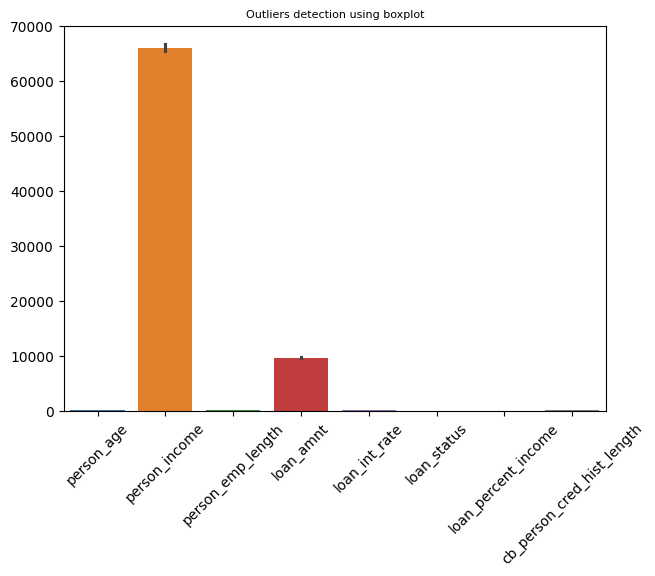

In [14]:
plt.figure(figsize=(7, 5))
sn.barplot(data=credit_risk[num_credit_risk])
plt.title('Outliers detection using boxplot', fontsize=8)
plt.xticks(rotation=45)
plt.show()

#### Pairplot

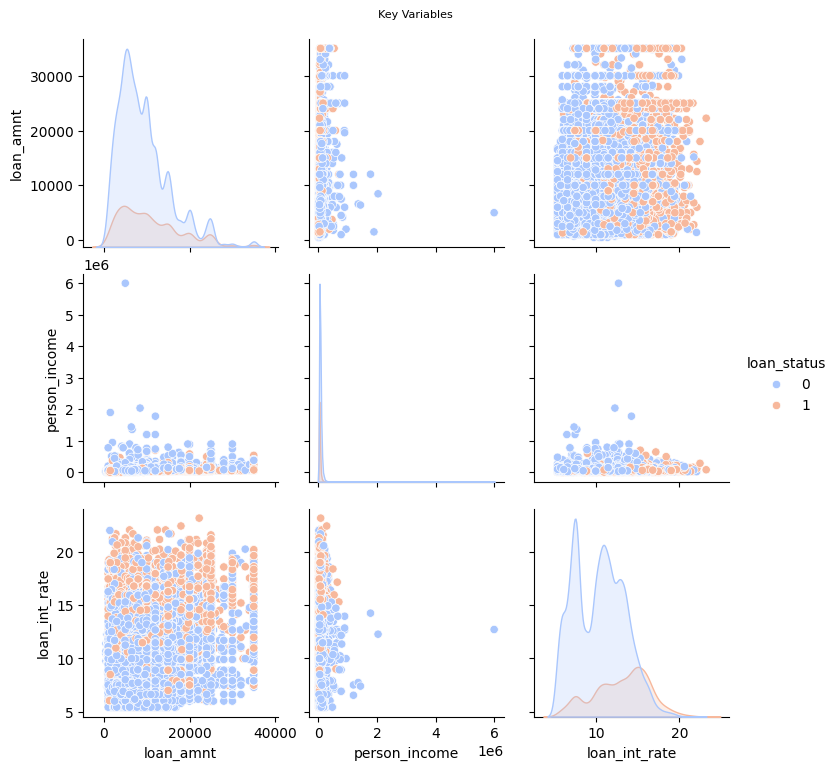

In [ ]:
sn.pairplot(credit_risk, vars=['loan_amnt', 'person_income', 'loan_int_rate'], hue= 'loan_status', palette='coolwarm')
plt.suptitle('Key Variables', y = 1.02, fontsize=8)
plt.show()

#### Correlation

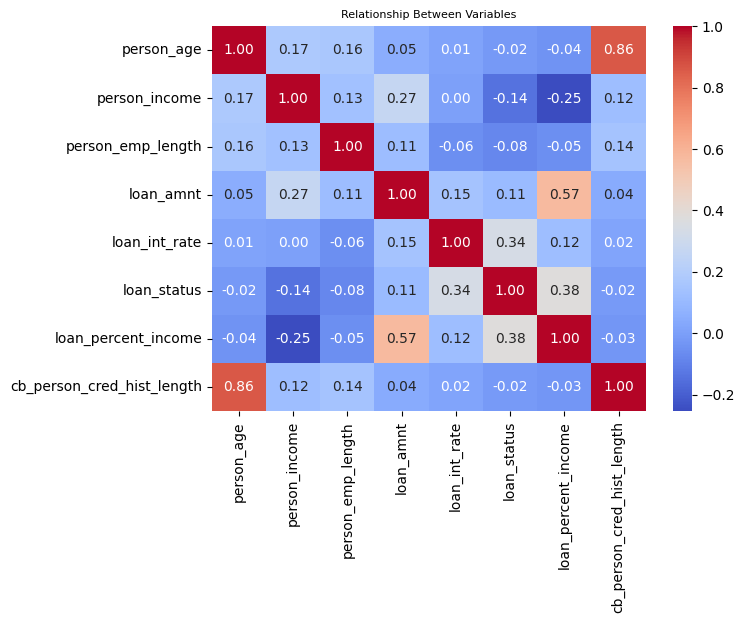

In [ ]:
plt.figure(figsize=(7,5))
sn.heatmap(credit_risk[num_credit_risk].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Relationship Between Variables', fontsize=8)
plt.show()

Correlation shows relationships between variables. from the heatmap it could be deduced that persons loan history and person age are 86% correlated. loan amount and loan percent income are 57% correlated. and Person income and loan person income have negative correlation of -25%

### Handle missing values

In [ ]:
credit_risk['person_emp_length'].fillna('Unknown', inplace= True)
for col in [ 'person_income','loan_int_rate', 'loan_amnt','loan_percent_income']:
    credit_risk[col].fillna(credit_risk[col].median(), inplace=True)

C:\Users\Fortu\AppData\Local\Temp\ipykernel_9616\1367714225.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_risk['person_emp_length'].fillna('Unknown', inplace= True)
C:\Users\Fortu\AppData\Local\Temp\ipykernel_9616\1367714225.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  credit_risk['person_emp_length'].fillna('Unknown', inplace=

In [18]:
credit_risk.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [19]:
credit_risk.drop(columns=['person_home_ownership',], inplace=True)


In [20]:
credit_risk.head(10)


,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


##### ecoding categorical data


In [21]:
credit_risk_lb = LabelEncoder()
credit_risk['loan_intent']= credit_risk_lb.fit_transform(credit_risk['loan_intent'])
credit_risk['loan_grade']= credit_risk_lb.fit_transform(credit_risk['loan_grade'])
credit_risk['cb_person_default_on_file']= credit_risk_lb.fit_transform(credit_risk['cb_person_default_on_file'])

In [22]:
credit_risk.head(6)

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,8.0,3,2,35000,14.27,1,0.55,1,4
5,21,9900,2.0,5,0,2500,7.14,1,0.25,0,2


### split dataset into training and testing set

In [23]:
x = credit_risk.drop(columns=['loan_status', 'loan_grade', 'person_emp_length','loan_int_rate'])
y = credit_risk['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
credit_risk_scaler = StandardScaler()
train_x_scale = credit_risk_scaler.fit_transform(x_train)
test_x_scale = credit_risk_scaler.fit_transform(x_test)

### Model Building

In [ ]:
model_1= LogisticRegression(random_state=42) 
model_2 = RandomForestClassifier(random_state=42)
model_3 = XGBClassifier(random_state=42)

# Train model
model_1.fit(train_x_scale, y_train)
model_2.fit(train_x_scale, y_train)
model_3.fit(train_x_scale, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Model Evaluation

In [26]:
prediction_1 = model_1.predict(test_x_scale)
probs_1 = model_1.predict_proba(test_x_scale)[:, 1]
print('Log Reg AUC', roc_auc_score(y_test,probs_1))

print('classification report', classification_report(y_test, prediction_1))

Log Reg AUC 0.7779463057049669
classification report               precision    recall  f1-score   support

           0       0.83      0.96      0.89      5095
           1       0.69      0.32      0.43      1422

    accuracy                           0.82      6517
   macro avg       0.76      0.64      0.66      6517
weighted avg       0.80      0.82      0.79      6517



In [27]:
prediction_2 = model_2.predict(test_x_scale)
probs_2 = model_2.predict_proba(test_x_scale)[:, 1]
print('RF AUC', roc_auc_score(y_test,probs_2))

print('classification report', classification_report(y_test, prediction_2))

RF AUC 0.8020138466188825
classification report               precision    recall  f1-score   support

           0       0.87      0.92      0.89      5095
           1       0.63      0.52      0.57      1422

    accuracy                           0.83      6517
   macro avg       0.75      0.72      0.73      6517
weighted avg       0.82      0.83      0.82      6517



In [28]:
prediction_3 = model_3.predict(test_x_scale)
probs_3 = model_3.predict_proba(test_x_scale)[:, 1]
print('XGBoost AUC', roc_auc_score(y_test,probs_3))

print('classification report', classification_report(y_test, prediction_1))

XGBoost AUC 0.7473313651038151
classification report               precision    recall  f1-score   support

           0       0.83      0.96      0.89      5095
           1       0.69      0.32      0.43      1422

    accuracy                           0.82      6517
   macro avg       0.76      0.64      0.66      6517
weighted avg       0.80      0.82      0.79      6517



# PREDICTION OF CREDIT RISK ANALYSIS

### Introduction

predicting credit risk, which employs financial data to estimate the likelihood that  customers will fail on loan, credit cards, and other lending services, was one of the first implementation of machine learnin. Financial institutions find it difficult to estimate credit risk, and numerous studies have tried to solve this issue. Financial institution may become more profitable if credit risk prediction system are used appropraitely. this can be used in application of loans and credit cards. Over the past few decades, credit risk prediction has gained popularity; one of the most important responsibilities facing creditors is predicting credit card default. this is due to the fact that there are significant more default transactions then non-default transactions. Therefore, it can be said that there is a class imbalance issue with the datasets used to predict credit risk. Previous research has demonstrated that class imbalance can cause machine learning model to perform poorly on classification, which leads to model bias toward a certain class at inference time.(IIebri et al.,2024)
The recent explosion in manchine learning technique for problem-solving can be linked to the exponential increase in processing capacity. Without any assumed correlation between variables, these methods can provide predictions without requiring an understanding of the underlying mechanism.(Fortune,2024).
This work will utilise three algorithms (Logisitc Regression, Random Forest, and XGBoost) in order to understand the prediction of credit risk analysis for Prospera bank.


#### Sources of Data
The data for this analysis is an historical dataset, was obtained by dataleum from an open-sources website kaggle.com, encompassing credit risk data. the dataset consisted of 12 variables and a total of 32581 entries. This work contain a mixture of numeric and categorical ones for the purpose of modelling. Loan_status is one of the variables that we are interested in and want to analysis and prediction for Prospera bank. Below is the sample of the dataset.
![alt text](image.png)

Table 1: Credit Risk Dataset. Source: Kaggle.com via Dataleum

#### Data Preprocesing
This step is very important in the process of data mining. it include the process of cleaning and transforming data, selecting the crucial columns for prediction, and dividing the dataset into training and testing sets for model building.

#### Data cleaning and Transformation
One of the requirements for precise categorisation in data mining is data cleaing. predicting may not be accurate if the data is not cleaned amd modified for quality mining. As a result, the data's missing field was addressed and the variables selected for the required prediction.

#### Model Building(Data Partitioning)
The dataset used for this work was partitioned into two(2) set: training set and testing set. This splitting enables us to evaluate the performance of the model on unknown data and guarantees the model is not overfitting to the training data. By partitioning the data into two distinct sets, the training set can be utilised to train the model, while the test set may be employed to evaluate the model's ability to apply it to unfamiliar data. This method facilitates the indentification and addressing of any potential problems with the model prior to its implementation in a real_world scenerio. The component of the partitioned two sets: the training set comprises of 80% of the entire dataset, and the test set comprises of the remaining 20%. Given that the target variable is categorical, a classifier machine model was utilised. More precisely, the dataset will be trained using a Logistic Regression, a Random Forest and a XGBoost model.

#### Package Used(Library)
The following library from sklearn.preprocessing import MinMaxScaler,from sklearn.model_selection import train_test_split,from sklearn.preprocessing import StandardScaler,LabelEncoder,import matplotlib.pyplot as plt, import seaborn as sn, from sklearn.linear_model import LogisticRegression, from sklearn.ensemble import RandomForestClassifier, from xgboost import XGBClassifier, from sklearn.metrics import classification_report, roc_auc_score were the important libraries needed for the manipulation, modelling, evaluation and visualisation of the dataset. The model was built using (from sklearn.linear_model import LogisticRegression, from sklearn.ensemble import RandomForestClassifier, from xgboost import XGBClassifier) libraries and the libraries used for visulaisation was seaborn and matplotlib. (from sklearn.metrics import classification_report,roc_auc_score) was used for the evaluation of the model.

#### Algorithms
The target variable in this work is loan_status. we aim to design a machine learning model capable of accurately classifying defaulter and non-defaulter. Accurate results could yield import data for the prediction of credit risk for Prospera bank. Three machine models were trained using Logistic Regression, Random Forest and XGBoost algorithms.

##### Logistic Regression
Logistic regression is a statistical model for binary categoristion. It predicts the probability that an instance will belong to a specific class using the sigmoid function, ensuring outcomes between 0 and 1. The model calcultes a linear combination of input features, applies the sigmoid to transform it, and then optimises its coefficieents using techniques such as gradient descent in order to minimise the log loss. The decision boundary that separates the classes is determined by these coefficients. for machine learning problems involving binary outcomes, logistic regression is frquently utilised due to its simplicity, interpretability, and adaptability across many domains. Regularisation can be used to prevent overfitting

##### Random Forest
Random Forest are a type of ensemble model built using decision trees. This model can effectively handle non_linear and high_dimensional variavles and is resistant to the negative effects of outliers. The method, called a classification algorithm, was first present by Tin Kam Ho in 1995, and Leo Breiman enhanced it in 2001. During the training phase, the method uses the bagging technique to construct multiple indpendent decision trees at the same time. it uses randomisation in features to generate an uncorrelated group trees, called a forest. Ech decision tree's classifications are gathered by the random forest classifier, which then uses the majority vote or confidence vote techniques to integrate the results. When compared to the combination of learning models that increase prediction accuracy, this results in a more accurate prediction.

##### XGBoost
XGBoost is a distributed gradient boosting library that has been optimised for scalable and effective machine learning model training. It is an ensemble learning technique that generates a stronger prediction by aggregating the predictions of several weak models. Because it can handle large datasets and achieve state-of-the-art performance in many machine learning tasks, including classification and regression, XGBoost, which stands for extreme gradient boosting has grown to become one of the most well-known and extensively used machine learning algorithms.

 
 
 #### Model design and Implementation

 To implement the classifier python was used, the software suite include three model: Logistic Regression, Random Forest and XGBoost. the data set was partioned into two set, the test set and training set, which was 20% of the sample, and the training set was 80% of the overall sanpmle. The portion of that data observation used to create the model is called the trianing set. the test set is a subset of data observation used in the model evaluation set, as shown below:
 
 

 #### Results and Discussion
 Model were built to predict credict risk analysis of prospera bank using 10 predictor variables along with the target variable. the report aims to identify the factors that contributes to credit risk of prospera bank. The used algorithm were Logistic regression, Random forest and Xgboosts. The evaluation of the prediction was conducted using AUC and classifier report.


 Logistic Regression: The prediction result of the Logistic regression model are presented in Table 2. the model accuracy is 82% which shows that significant proportion of the samples was predicted correctly. The 0.77 AUC score gives a moderate ability to distinguish between the two classes. though the results reveal great disparities in performance between the majority class(class 0(repayment)) and the minority class(1(loan Default)).

 For loan repayment which is class 0 the precision score is 0.83 which demostrate that 83% of all the predicted case of 0 label is being accurate. while for the loan default which is class 1 are only 69% correctly predicted which is lower than the class 0. The Recall score is 0.96 which capture almost all actual instances of repayment class, showing very high sensitivity for loan default class the Recall score is 0.32 badly indicating sensitivity and alot of instances of the loan default class was misclassified as repyament class. for the repayment class F1-score reflect a strong balance between precision and recall which is 89% but for that of loan default class which has low f1 score of 43% indicate poor balance between precision and recall.


 


 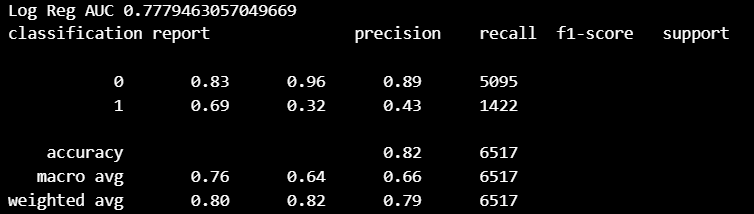
 
 Table2: Logistic Regression Model Result


 ### Random Forest:
 The prediction result of the Random Forest model are presented in Table 3.
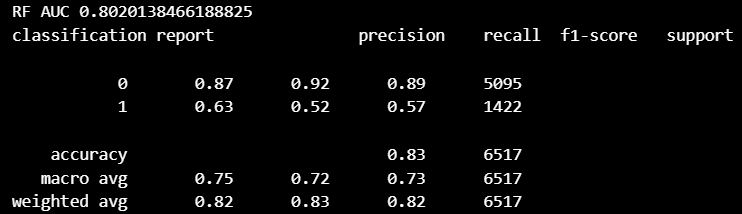
 
 Table3: Random Forest Model Result
 
 The Random Forest model achieved 83% accuracy, which is a little beat better than the logistic regression. 0.80 AUC score indicated an improvement in the model ability to distinquish between the loan default and repayment classes compared to logistic regression AUC score of 0.77. this indicates that the Random forest model captured more complex relationship with the data.
 

### XGBOOST:
The prediction result of the XGBoost are presented in Table 4. The XGboost had accuracy of 82%, which corresponded to that of the Logist Regression model but alittle bit lower than the Rf model of 83%. the AUC score of  0.74 is lower than both the logistic regression Auc of 0.77 and RF AUC 0.80. which suggest that XGBoost stuggled more with distibguishing between the loan default class and repayment class.

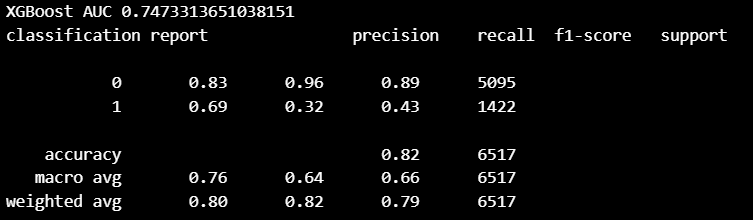

Table4: XGBOOSt Model Result


#### Recommendation
Prospera bank should set loan limit for high risk borrowers to mitigate exposure to non-repayment of loan, loan approval criteria should defined. Customer repayment should be track. this will enable them to spot signs of potential defaults early.